## Support Vector Machine
_______________________________________________________________________

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [17]:
X_train = pd.read_csv('X_train.csv')
# flatten y_train to a 1D array for the model to not have a warning
y_train = pd.read_csv('y_train.csv').values.ravel()

**Support Vector Regression**
SVR is a regression model derived from Support Vector Machines. It tries to fit a function within a margin of tolerance (epsilon) around the actual target values while keeping the models as simple as possible.
- Kernel: defines how input features are mapped
  * linear assumes a straight-line relationship
  * rbf allows for nonlinear relationships
- C: controls regularization; a higher C fits training data more closely, a lower C allows for a smoother model
- Epsilon: defines a margin of error where deviations from the true values are ignored
- Gamma: for RBF kernel: determines the influence of single points on the model; smaller values spread influence wider


In [19]:
# set global random seed for reproducibility
np.random.seed(123)

# SVM pipeline and training
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()), # standard scaler inside the pipeline
    ('svr', SVR()) # specifying SVM
])

# hyperparameter grid for tuning
param_grid = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.001, 0.01, 0.1, 0.5],
    'svr__gamma': ['scale', 'auto']
}

# using KFold with fixed random_state for reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# grid search with cross validation
svr_grid = GridSearchCV(
    svr_pipeline,
    param_grid,
    cv=kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# fitting the model
svr_grid.fit(X_train, y_train)

print("Best SVR params:", svr_grid.best_params_)
print("Best SVR CV MSE:", -svr_grid.best_score_)

# final evaluation on training data using best model
best_svr = svr_grid.best_estimator_
svr_pred = best_svr.predict(X_train)

print("SVR Final Evaluation (on best parameters):")
print("MSE:", mean_squared_error(y_train, svr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, svr_pred)))
print("R²:", r2_score(y_train, svr_pred))


Best SVR params: {'svr__C': 0.1, 'svr__epsilon': 0.001, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Best SVR CV MSE: 7.811344601936992
SVR Final Evaluation (on best parameters):
MSE: 7.433891814582198
RMSE: 2.7265164247776315
R²: 0.034949870153676454


Some Visualizations

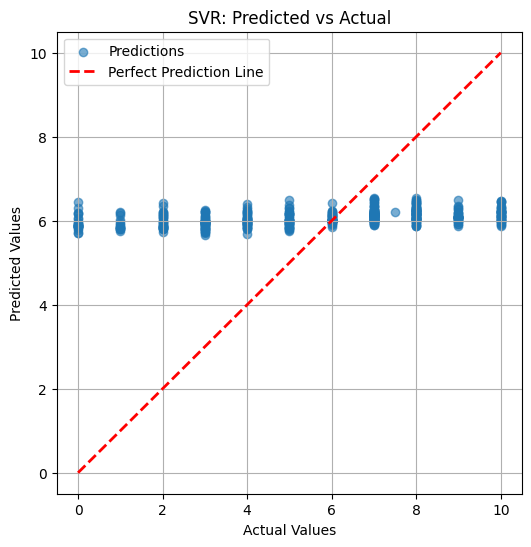

In [20]:
import matplotlib.pyplot as plt

svr_pred = best_svr.predict(X_train)

plt.figure(figsize=(6,6))
plt.scatter(y_train, svr_pred, alpha=0.6, label="Predictions")
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    'r--', lw=2, label="Perfect Prediction Line"
)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.show()


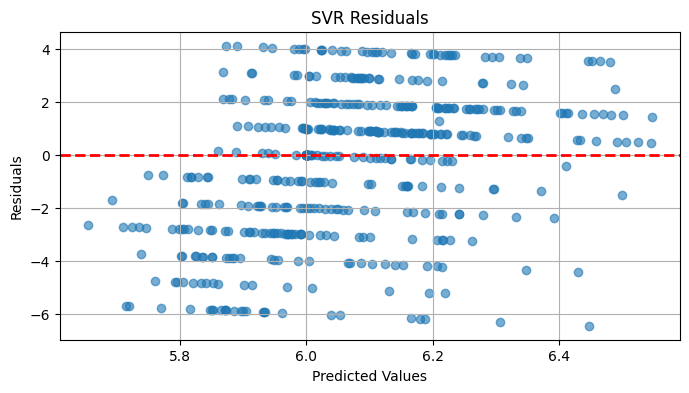

In [21]:
svr_residuals = y_train - svr_pred

plt.figure(figsize=(8,4))
plt.scatter(svr_pred, svr_residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("SVR Residuals")
plt.grid(True)
plt.show()
